In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    cross_val_score, RepeatedStratifiedKFold,RandomizedSearchCV, GridSearchCV, train_test_split
    )
from sklearn.metrics import mean_absolute_error, mean_squared_error
import yfinance as yf

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 500)

RANDOM_SEED = 42

In [16]:
start_date = "2021-01-01"
end_date = "2021-08-23"

ticker = 'Lelisblanc'

df_ticker = yf.download('LLIS3.SA', start=start_date, end=end_date)
df_ticker.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,5.04,5.04,4.86,5.00,5.00,88500
2021-01-05,5.00,5.00,4.87,4.95,4.95,46100
2021-01-06,4.90,4.99,4.77,4.77,4.77,95200
2021-01-07,4.90,4.90,4.70,4.71,4.71,74200
2021-01-08,4.72,4.93,4.72,4.93,4.93,80500


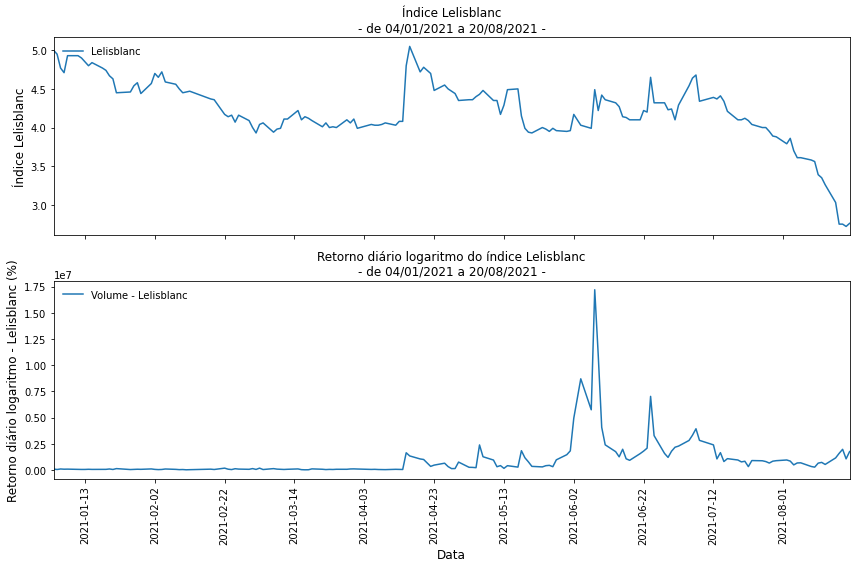

In [21]:
fontsize = 12

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)

date_min = df_ticker.index.min()
date_max = df_ticker.index.max()

ax.plot(df_ticker['Close'], label=ticker)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(f'Índice {ticker}', fontsize=fontsize)
ax.set_title(f"""Índice {ticker}
- de {date_min.strftime("%d/%m/%Y")} a {date_max.strftime("%d/%m/%Y")} -""", fontsize = 12)
ax.legend(loc='upper left', frameon=False)
ax = fig.add_subplot(212, sharex=ax)

ax.plot(df_ticker['Volume'], label=f"Volume - {ticker}")
ax.yaxis.set_label("Data")
ax.xaxis.set_major_locator(plt.MaxNLocator(13))
# ax.yaxis.set_major_locator(plt.MaxNLocator(8))
# ax.set_ylim(-6, 6)
ax.set_xlim(left=date_min, right=date_max)
ax.set_xlabel('Data', fontsize=fontsize)
ax.set_ylabel(f"Volume - {ticker} (%)", fontsize=fontsize)
ax.set_title(f"""Volume {ticker}
- de {date_min.strftime("%d/%m/%Y")} a {date_max.strftime("%d/%m/%Y")} -""", fontsize = 12)
ax.legend(loc='upper left', frameon=False)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();